<a href="https://colab.research.google.com/github/Sanaa-6/LGMVIP--DataScience/blob/main/Task_2_Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music Recommendation System**

Music recommender systems can suggest songs to users based on their listening patterns.

**Author: Sanjana Patil.**

**Link for the dataset:**https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data

# **Importing the Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# **Loading the dataset**

In [ ]:
data_songs = pd.read_csv("/content/songs.csv")
data_songs_extra_info =  pd.read_csv("/content/song_extra_info.csv")
data_train = pd.read_csv("/content/train.csv")
data_test= pd.read_csv("/content/test.csv")
data_members= pd.read_csv("/content/members.csv")
data_sample_submission= pd.read_csv("/content/sample_submission.csv")

**Displaying all the datasets**

In [ ]:
data_songs

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
73891,hrw9AFyW/U6MN4xTwK+QTLKVPgQVqnVzQJNGLFvif3E=,209119,465,Little Mix,Larry Blackmon|Tomi Jenkins,Larry Blackmon|Tomi Jenkins,52.0
73892,K4Ydr27XRni6SCqjCqsEC8kyUtCLoT0FvWDPrmVb5Lg=,302027,2022,Chicago,NaN,NaN,-1.0
73893,va5jkA7P/o3nl0g1DhdfvhMqSgNy+BJSQpWS8HieIPo=,77322,921|458,Various Artists,陳建騏,NaN,3.0
73894,5SX1wVXx+9TsTMwS2R7Ugb12UFQH5vgclo3rM/8u/KA=,290226,2022,Bob Dylan,NaN,NaN,52.0


In [ ]:
data_songs_extra_info

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
81903,4Sd1MhOwul+snJwWPYhTu5gYCTdURVq5PwsZ/zEnkUk=,波斯貓,TWD951506122
81904,nwDt24x9+Xi5RUoCdf1pc3mGpfnxnYhsYRg7m6oYrBQ=,Nobody To Blame,USUM71418076
81905,LApS1UIDmXR5+UKEcYUXK/RiiRf7wTjrncD2PBDIjcA=,集結の園へ （『CR新世紀エヴァンゲリオン 〜最後のシ者〜』 イメージソング）,JPP751101071
81906,Z6+GsTwG2KeZLZmukT7NaQ7IStSffasrnu8ww0MEkxQ=,"天蠶變(麗的電視劇""天蠶變""主題曲)",HKA619900264


In [ ]:
data_train

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0
...,...,...,...,...,...,...
31168,rGbXmjKDOsBV9n2LJEPtx4GcJS00c7Bs9ZFo6icxVJM=,ML4JT5C349ybpJrR9xuj9vkknukFHhaQaLpGAF8VMnw=,my library,Local playlist more,local-library,1.0
31169,eipoChVclzQ9iLORwmF3D1YvduQldX7Ms9Jgsfhz70Q=,+z1cI5V6Lw/6XhSM4kup0elEfcw08gdtP3GQbmxUubI=,my library,Local playlist more,local-library,1.0
31170,eipoChVclzQ9iLORwmF3D1YvduQldX7Ms9Jgsfhz70Q=,CyVtA0g6BLii1x9U65fijRIaQ3o0Y2XxpgUmzxHl9Qo=,my library,Local playlist more,local-library,1.0
31171,d2NlxvMq+EO+xHOWa6mO1SP656/w3C4ONWLv5meA7b4=,7MOQcZUsDnFqxr0HT7oSIC3eIDdyMciaBFD9h0vvpdQ=,my library,Local playlist more,local-library,1.0


In [ ]:
data_test

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
...,...,...,...,...,...,...
38892,38892,livPmajZnOYpHSgzCxoO8iSKwvFFZ2PGI1Hs9bYnhOM=,lqlFvV5MDdO05s95G69yIT5tU/feF3/YZcFOLEUsmu4=,discover,NaN,song-based-playlist
38893,38893,livPmajZnOYpHSgzCxoO8iSKwvFFZ2PGI1Hs9bYnhOM=,SEsmD5LABtzHiNkpzabLIieBPqt4TNnA6phewMA8/ww=,discover,NaN,song-based-playlist
38894,38894,livPmajZnOYpHSgzCxoO8iSKwvFFZ2PGI1Hs9bYnhOM=,IahD0yX55KQ4Hdba8BJfoalL5d7nH9TZjz0WMYMdS48=,discover,NaN,song-based-playlist
38895,38895,P91w/h5+ETY2ScpJccDfR2+pe+lTaMk7nD89xWMAS5Y=,e3RsFrCfDxYoWQDHfGPYviP9jw0oddAYEQYfu+T01ZI=,discover,Online playlist more,online-playlist


In [ ]:
data_members

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


In [ ]:
data_sample_submission

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
200746,200746,0.5
200747,200747,0.5
200748,200748,0.5
200749,200749,0.5


# **EDA on data_Songs dataset**

In [ ]:
for columns in data_songs.columns:
    print(columns)

song_id
song_length
genre_ids
artist_name
composer
lyricist
language


In [ ]:
data_songs.shape

(73896, 7)

In [ ]:
data_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73896 entries, 0 to 73895
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   song_id      73896 non-null  object 
 1   song_length  73896 non-null  int64  
 2   genre_ids    72534 non-null  object 
 3   artist_name  73896 non-null  object 
 4   composer     42980 non-null  object 
 5   lyricist     20342 non-null  object 
 6   language     73895 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 3.9+ MB


In [ ]:
data_songs.describe()

,song_length,language
count,7.389600e+04,73895.000000
mean,2.466984e+05,26.106191
std,1.289378e+05,23.289970
min,2.716000e+03,-1.000000
25%,1.998345e+05,3.000000
50%,2.340570e+05,24.000000
75%,2.732400e+05,52.000000
max,6.448901e+06,59.000000


In [ ]:
data_songs.isnull()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
73891,False,False,False,False,False,False,False
73892,False,False,False,False,True,True,False
73893,False,False,False,False,False,True,False
73894,False,False,False,False,True,True,False


In [ ]:
data_songs.isnull().sum()


song_id            0
song_length        0
genre_ids       1362
artist_name        0
composer       30916
lyricist       53554
language           1
dtype: int64

In [ ]:
data_songs.drop(['composer'], axis =1, inplace=True)
data_songs.drop(['lyricist'], axis =1, inplace=True)

In [ ]:
data_songs.isnull().sum()

song_id           0
song_length       0
genre_ids      1362
artist_name       0
language          1
dtype: int64

In [ ]:
data_songs.fillna(method='ffill', inplace=True)

In [ ]:
data_songs.isnull().sum()

song_id        0
song_length    0
genre_ids      0
artist_name    0
language       0
dtype: int64

# **Data Visualizations:**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


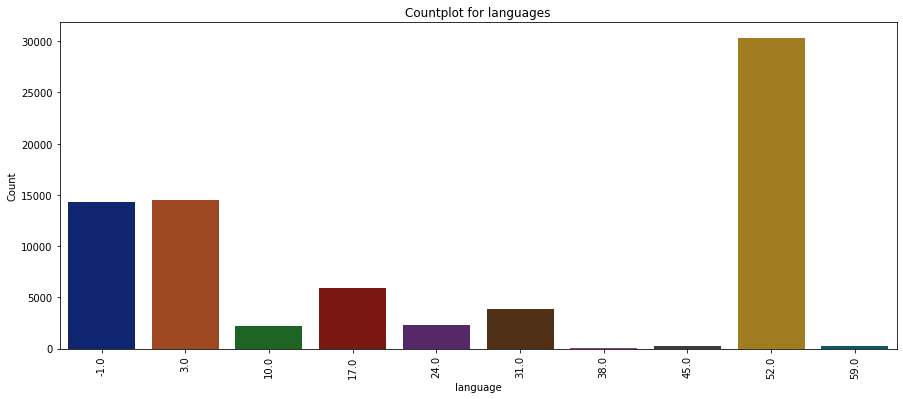

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(data_songs['language'].value_counts().index,data_songs['language'].value_counts()[:].values,palette = 'dark')
plt.title('Countplot for languages')
plt.xlabel('language')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


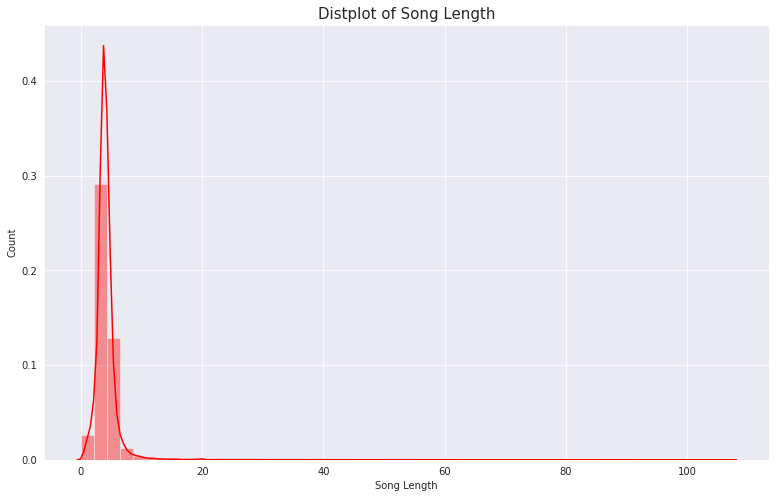

In [ ]:
plt.figure(figsize=(13, 8))
sns.set_style("darkgrid")
ax = sns.distplot(data_songs.song_length/60000, color='r')
ax.set_title('Distplot of Song Length', fontsize=15)
ax.set(xlabel='Song Length', ylabel='Count')
plt.show()

# **EDA on member dataset**

In [ ]:
for columns in data_members.columns:
    print(columns)

msno
city
bd
gender
registered_via
registration_init_time
expiration_date


In [ ]:
data_members.shape

(34403, 7)

In [ ]:
data_members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [ ]:
data_members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [ ]:
data_members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [ ]:
data_members.fillna(method='bfill', inplace=True)

In [ ]:
data_members.isnull().sum()

msno                      0
city                      0
bd                        0
gender                    3
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot for gender')

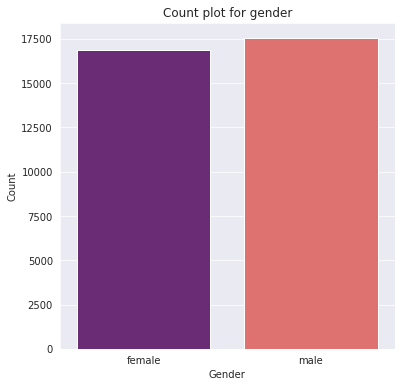

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data_members['gender'], data=data_members, palette = 'magma')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation='0')
plt.title('Count plot for gender')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot for Registation Method')

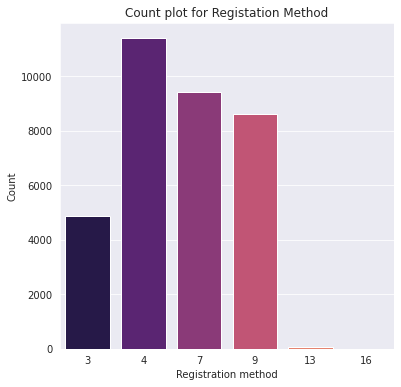

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data_members['registered_via'], data=data_members, palette = 'magma')
plt.xlabel('Registration method')
plt.ylabel('Count')
plt.xticks(rotation='0')
plt.title('Count plot for Registation Method')

# **EDA on data_songs_extra_info dataset**

In [ ]:
for columns in data_songs_extra_info.columns:
    print(columns)

song_id
name
isrc


In [ ]:
data_songs_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:
data_songs_extra_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81908 entries, 0 to 81907
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   song_id  81908 non-null  object
 1   name     81907 non-null  object
 2   isrc     71278 non-null  object
dtypes: object(3)
memory usage: 1.9+ MB


In [ ]:
data_songs_extra_info.describe()

,song_id,name,isrc
count,81908,81907,71278
unique,81908,67456,68634
top,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,Silent Night,GBPS81529088
freq,1,47,7


In [ ]:
data_songs_extra_info.isnull().sum()

song_id        0
name           1
isrc       10630
dtype: int64

In [ ]:
data_songs_extra_info.drop('isrc', axis = 1, inplace = True)

# **EDA on Training set**

In [ ]:
for columns in data_train.columns:
    print(columns)

msno
song_id
source_system_tab
source_screen_name
source_type
target


In [ ]:
data_train.shape

(31173, 6)

In [ ]:
data_train.isnull().sum()

msno                     0
song_id                  0
source_system_tab       92
source_screen_name    1028
source_type             65
target                   1
dtype: int64

In [ ]:
data_train['source_system_tab'].fillna('my library',inplace=True)
data_train['source_type'].fillna('local-library',inplace=True)
data_train['source_screen_name'].fillna('Local playlist',inplace=True)
data_train['target'].fillna(method='ffill', inplace=True)
data_train['song_id'].fillna(method='ffill', inplace=True)

In [ ]:
data_train.isnull().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count plot for system tab there are using')

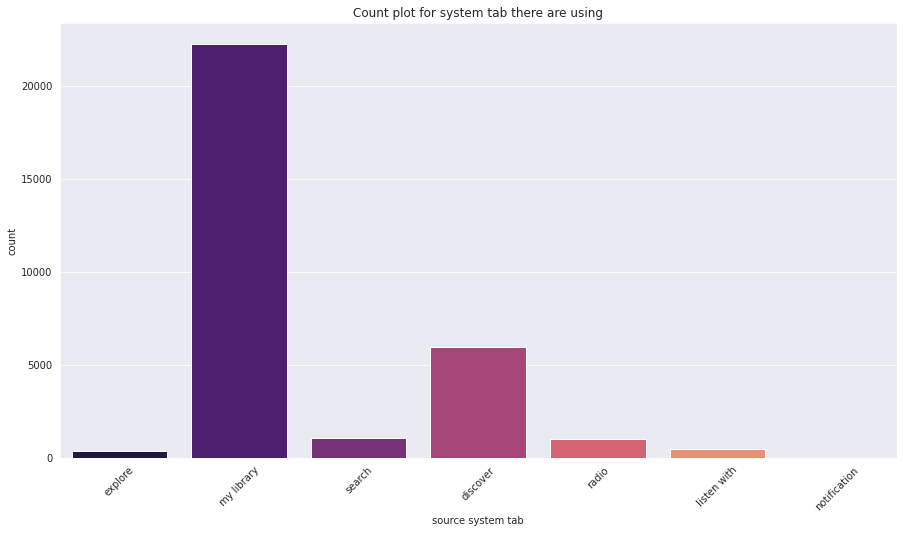

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data_train['source_system_tab'],data=data_train, palette = 'magma')
plt.xlabel('source system tab')
plt.ylabel('count')
plt.xticks(rotation='45')
plt.title('Count plot for system tab there are using')

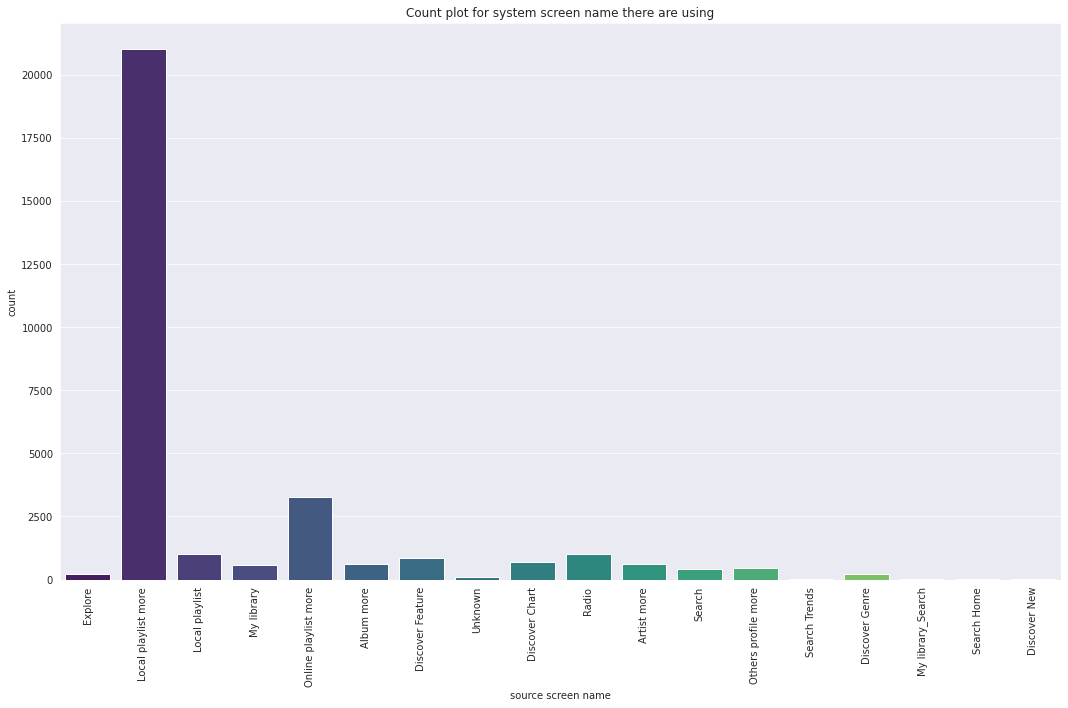

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x=data_train['source_screen_name'],data=data_train, palette = 'viridis')
sns.set(style="darkgrid")
plt.xlabel('source screen name')
plt.ylabel('count')
plt.xticks(rotation='90')
plt.title('Count plot for system screen name there are using')
plt.tight_layout()

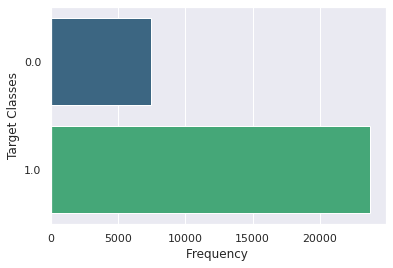

In [ ]:
sns.countplot(y=data_train['target'],data=data_train, palette = 'viridis')
plt.ylabel('Target Classes')
plt.xlabel('Frequency ')
plt.show()

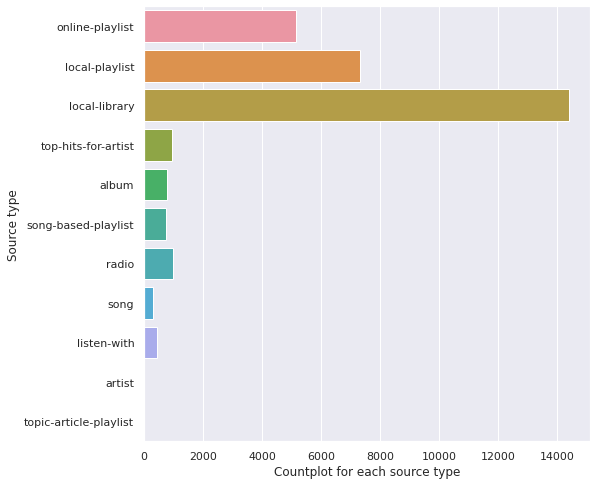

In [ ]:
plt.figure(figsize = (8,8))
sns.countplot(y=data_train['source_type'],data=data_train)
plt.ylabel('Source type')
plt.xlabel('Countplot for each source type')
plt.show()

# **Displaying information about the Test Dataset**

In [ ]:
for columns in data_test.columns:
    print(columns)

id
msno
song_id
source_system_tab
source_screen_name
source_type


In [ ]:
data_train.shape

(31173, 6)

# **Displaying information about the Sample Submission Dataset**

In [ ]:
for columns in data_sample_submission:
    print(columns)

id
target


In [ ]:
data_sample_submission.shape

(200751, 2)

# **Merging the datasets**

In [ ]:
merged_songs = pd.merge(data_songs, data_songs_extra_info, on ='song_id' ,how='left')
merged_train_members = pd.merge(data_train, data_members, on ='msno' ,how='left')
train_data = pd.merge(merged_train_members, merged_songs, on ='song_id' ,how='left')

In [ ]:
train_data.shape

(31173, 17)

In [ ]:
train_data.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'song_length', 'genre_ids',
       'artist_name', 'language', 'name'],
      dtype='object')

# **Data Preprocessing**

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31173 entries, 0 to 31172
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    31173 non-null  object 
 1   song_id                 31173 non-null  object 
 2   source_system_tab       31173 non-null  object 
 3   source_screen_name      31173 non-null  object 
 4   source_type             31173 non-null  object 
 5   target                  31173 non-null  float64
 6   city                    31173 non-null  int64  
 7   bd                      31173 non-null  int64  
 8   gender                  31173 non-null  object 
 9   registered_via          31173 non-null  int64  
 10  registration_init_time  31173 non-null  int64  
 11  expiration_date         31173 non-null  int64  
 12  song_length             8643 non-null   float64
 13  genre_ids               8643 non-null   object 
 14  artist_name             8643 non-null 

In [ ]:
train_data.describe()

,target,city,bd,registered_via,registration_init_time,expiration_date,song_length,language
count,31173.000000,31173.000000,31173.000000,31173.000000,3.117300e+04,3.117300e+04,8.643000e+03,8643.000000
mean,0.761685,7.718699,17.768325,6.785487,2.012626e+07,2.017169e+07,2.449651e+05,17.119519
std,0.426060,6.431464,15.688366,2.293174,2.923959e+04,3.347205e+03,5.156270e+04,20.351617
min,0.000000,1.000000,0.000000,3.000000,2.004033e+07,2.016021e+07,5.944000e+03,-1.000000
25%,1.000000,1.000000,0.000000,4.000000,2.011061e+07,2.017091e+07,2.151960e+05,3.000000
50%,1.000000,5.000000,22.000000,7.000000,2.013072e+07,2.017093e+07,2.417890e+05,3.000000
75%,1.000000,13.000000,29.000000,9.000000,2.015081e+07,2.017101e+07,2.716730e+05,31.000000
max,1.000000,22.000000,131.000000,13.000000,2.016120e+07,2.019041e+07,1.802936e+06,59.000000


In [ ]:
train_data.drop(['msno'], axis = 1, inplace=True)
train_data.drop(['song_id'], axis = 1, inplace=True)

In [ ]:
df = train_data

# **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
source_system_tab = encoder.fit_transform(df['source_system_tab'])
source_screen_name = encoder.fit_transform(df['source_screen_name'])
source_type = encoder.fit_transform(df['source_type'])
gender	= encoder.fit_transform(df['gender'])
artist_name = encoder.fit_transform(df['artist_name'])
name = encoder.fit_transform(df['name'])
genre_ids = encoder.fit_transform(df['genre_ids'])

In [ ]:
df['source_system_tab'] = source_system_tab
df['source_screen_name'] = source_screen_name
df['source_type'] = source_type
df['gender'] = gender
df['artist_name'] = artist_name
df['name'] = name
df['genre_ids'] = genre_ids

In [ ]:
df

,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,language,name
0,1,6,5,1.0,1,0,1,7,20120102,20171005,NaN,84,1390,NaN,674
1,3,8,4,1.0,13,24,0,9,20110525,20170911,NaN,84,1390,NaN,674
2,3,8,4,1.0,13,24,0,9,20110525,20170911,NaN,84,1390,NaN,674
3,3,8,4,1.0,13,24,0,9,20110525,20170911,NaN,84,1390,NaN,674
4,1,6,5,1.0,1,0,1,7,20120102,20171005,NaN,84,1390,NaN,674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31168,3,8,3,1.0,13,23,1,9,20110705,20170919,NaN,84,1390,NaN,674
31169,3,8,3,1.0,15,27,1,9,20050319,20170930,274808.0,41,836,3.0,674
31170,3,8,3,1.0,15,27,1,9,20050319,20170930,228519.0,41,725,31.0,674
31171,3,8,3,1.0,10,28,1,9,20090217,20171006,NaN,84,1390,NaN,674


In [ ]:
df.isnull().sum()

source_system_tab             0
source_screen_name            0
source_type                   0
target                        0
city                          0
bd                            0
gender                        0
registered_via                0
registration_init_time        0
expiration_date               0
song_length               22530
genre_ids                     0
artist_name                   0
language                  22530
name                          0
dtype: int64

In [ ]:
df.dropna(subset = ['genre_ids', 'song_length', 'language'], inplace = True)
df.isnull().sum()

source_system_tab         0
source_screen_name        0
source_type               0
target                    0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
song_length               0
genre_ids                 0
artist_name               0
language                  0
name                      0
dtype: int64

In [ ]:
df.to_csv('preprocessed_data2.csv')
df1 = df[0:30000]

# **Model Building and Evaluation**

In [ ]:
Y = df1.target
X = df1.drop('target', axis = 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
print("shape of x_train:",X_train.shape)
print("shape of x_test:",X_test.shape)

shape of x_train: (6482, 14)
shape of x_test: (2161, 14)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
pred=rfc.predict(X_test)

# **Model Evaluation**

In [ ]:
accuracy_score(Y_test, pred)*100

81.72142526608052

In [ ]:
print ("Accuracy is :", accuracy_score(Y_test, pred)*100)

Accuracy is : 81.72142526608052


In [ ]:
confusion_matrix(Y_test, pred)

array([[ 161,  319],
       [  76, 1605]])

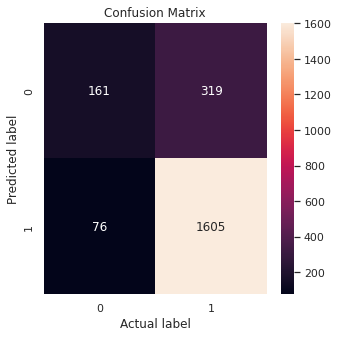

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(Y_test, pred), annot = True, fmt = 'g')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

# **Thank You.**